# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f' This dataframe contains {len(cities)} cities.')

 This dataframe contains 618 cities.


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up empty lists, variables and url.
City = []
Lat =[]
Lng =[]
Max_Temp = []
Humidity = []
Cloudiness = []
Wind_Speed =[]
Country= []
Date = []
x = 1
url = "http://api.openweathermap.org/data/2.5/weather?"

#loop through list of cities, and populate lists. Declare expections and move on.
print("Beginning Data Retrieval")
print("-----------------------------")
for city in cities:
    print (f"Processing Record {x} of {len(cities)}, {city}")
    query_url = f"{url}appid={weather_api_key}&q={city}"        
    geo_data = requests.get(query_url).json()
    try:
        Lat.append(geo_data['coord']['lat'])
        Lng.append(geo_data['coord']['lon'])
        Max_Temp.append(9/5*(geo_data['main']['temp_max']-273.15)+32)
        Humidity.append(geo_data['main']['humidity'])
        Cloudiness.append(geo_data['clouds']['all'])
        Wind_Speed.append(geo_data['wind']['speed'])
        Country.append(geo_data['sys']['country'])
        Date.append(geo_data['dt'])
        City.append(city)
    except KeyError:
        print(f"Ya, so {city} doesn't exist. In this database, at least. Moving on...")
    x = x +1    
print("That took a while. But we're done now")        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of 618, faanui
Processing Record 2 of 618, isla mujeres
Processing Record 3 of 618, lompoc
Processing Record 4 of 618, miyako
Processing Record 5 of 618, vaini
Processing Record 6 of 618, mataura
Processing Record 7 of 618, rikitea
Processing Record 8 of 618, taikang
Processing Record 9 of 618, bredasdorp
Processing Record 10 of 618, belushya guba
Ya, so belushya guba doesn't exist. In this database, at least. Moving on...
Processing Record 11 of 618, atuona
Processing Record 12 of 618, alice springs
Processing Record 13 of 618, port hedland
Processing Record 14 of 618, lima
Processing Record 15 of 618, samusu
Ya, so samusu doesn't exist. In this database, at least. Moving on...
Processing Record 16 of 618, busselton
Processing Record 17 of 618, ilulissat
Processing Record 18 of 618, avarua
Processing Record 19 of 618, albany
Processing Record 20 of 618, formoso do araguaia
Ya, so formoso do araguaia doesn't exi

Processing Record 179 of 618, nikolskoye
Processing Record 180 of 618, bartlesville
Processing Record 181 of 618, bethel
Processing Record 182 of 618, shache
Processing Record 183 of 618, safwah
Ya, so safwah doesn't exist. In this database, at least. Moving on...
Processing Record 184 of 618, kruisfontein
Processing Record 185 of 618, srednekolymsk
Processing Record 186 of 618, yertsevo
Processing Record 187 of 618, thanh hoa
Processing Record 188 of 618, talnakh
Processing Record 189 of 618, kloulklubed
Processing Record 190 of 618, bengkulu
Processing Record 191 of 618, mount gambier
Processing Record 192 of 618, ouesso
Processing Record 193 of 618, oranjestad
Processing Record 194 of 618, flin flon
Processing Record 195 of 618, wulanhaote
Ya, so wulanhaote doesn't exist. In this database, at least. Moving on...
Processing Record 196 of 618, yurty
Processing Record 197 of 618, viru
Processing Record 198 of 618, lamar
Processing Record 199 of 618, horta
Processing Record 200 of 618, 

Processing Record 365 of 618, lata
Processing Record 366 of 618, keti bandar
Processing Record 367 of 618, karratha
Processing Record 368 of 618, qaqortoq
Processing Record 369 of 618, concordia
Processing Record 370 of 618, taoudenni
Processing Record 371 of 618, sakakah
Processing Record 372 of 618, kotelnikovo
Processing Record 373 of 618, chokwe
Processing Record 374 of 618, itupiranga
Processing Record 375 of 618, urla
Processing Record 376 of 618, jalu
Processing Record 377 of 618, vestmannaeyjar
Processing Record 378 of 618, bilibino
Processing Record 379 of 618, elbrus
Processing Record 380 of 618, manokwari
Processing Record 381 of 618, praya
Processing Record 382 of 618, esperance
Processing Record 383 of 618, grand river south east
Ya, so grand river south east doesn't exist. In this database, at least. Moving on...
Processing Record 384 of 618, sangar
Processing Record 385 of 618, cabo san lucas
Processing Record 386 of 618, kavieng
Processing Record 387 of 618, utete
Proce

Processing Record 556 of 618, atambua
Processing Record 557 of 618, darnah
Processing Record 558 of 618, yangcun
Processing Record 559 of 618, natal
Processing Record 560 of 618, lundazi
Processing Record 561 of 618, eurajoki
Processing Record 562 of 618, gerash
Processing Record 563 of 618, tommot
Processing Record 564 of 618, north bend
Processing Record 565 of 618, cururupu
Processing Record 566 of 618, umm lajj
Processing Record 567 of 618, itajuipe
Processing Record 568 of 618, mubi
Processing Record 569 of 618, sisimiut
Processing Record 570 of 618, chandler
Processing Record 571 of 618, raudeberg
Processing Record 572 of 618, sataua
Ya, so sataua doesn't exist. In this database, at least. Moving on...
Processing Record 573 of 618, kafr sawm
Processing Record 574 of 618, puerto escondido
Processing Record 575 of 618, tokmak
Processing Record 576 of 618, urumqi
Processing Record 577 of 618, broome
Processing Record 578 of 618, shenjiamen
Processing Record 579 of 618, andijon
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#set up and populate a dataframe. and count the columns.
city_data_df = pd.DataFrame({"City": City,
"Lat":Lat,
"Lng":Lng,
"Max Temp":Max_Temp,
"Humidity":Humidity,
"Cloudiness":Cloudiness,
"Wind Speed":Wind_Speed,
"Country":Country,
"Date":Date})
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [5]:
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.48,-151.75,78.872,86,20,7.38,PF,1592279768
1,isla mujeres,21.23,-86.73,82.004,83,75,1.50,MX,1592280338
2,lompoc,34.64,-120.46,60.800,77,100,5.10,US,1592280052
3,miyako,39.64,141.95,76.928,47,71,5.94,JP,1592280338
4,vaini,-21.20,-175.20,73.400,69,20,5.70,TO,1592280009


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# Get the indices of cities that have humidity over 100%.
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Also getting rid of outliers where Wind Speed is ludicrous.
city_data_df = city_data_df.loc[city_data_df['Wind Speed'] < 50]
city_data_df2 = city_data_df.loc[city_data_df['Humidity'] >100]
if len(city_data_df2) == 0:
    print("There are zero cities in this dataframe with humidity over 100")
else:
    city_data_df = city_data_df.loc[city_data_df['Humidity'] <=100]
    print(f"There was {len(city_data_df2)} cities in this dataframe with humidity over 100. There are gone now. Don't ask how. Let us never speak of this again.")   
print("This is a summary of how the cleaned up dataframe looks:")
clean_city_data_df = city_data_df
clean_city_data_df.describe()

There are zero cities in this dataframe with humidity over 100
This is a summary of how the cleaned up dataframe looks:


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000,5.740000e+02
mean,20.829146,20.041237,67.980714,67.815331,47.533101,3.669564,1.592280e+09
std,33.032672,89.901072,14.812142,22.487632,38.389000,2.362770,2.154619e+02
min,-54.800000,-175.200000,28.940000,3.000000,0.000000,0.100000,1.592280e+09
25%,-6.332500,-56.135000,57.200000,54.000000,5.000000,1.905000,1.592280e+09
50%,25.675000,22.060000,69.197000,74.000000,41.000000,3.160000,1.592280e+09
75%,47.660000,104.775000,80.510000,84.000000,88.000000,5.100000,1.592280e+09
max,78.220000,178.420000,107.150000,100.000000,100.000000,13.520000,1.592280e+09


In [7]:
clean_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,faanui,-16.48,-151.75,78.872,86,20,7.38,PF,1592279768
1,isla mujeres,21.23,-86.73,82.004,83,75,1.50,MX,1592280338
2,lompoc,34.64,-120.46,60.800,77,100,5.10,US,1592280052
3,miyako,39.64,141.95,76.928,47,71,5.94,JP,1592280338
4,vaini,-21.20,-175.20,73.400,69,20,5.70,TO,1592280009


In [8]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
clean_city_data_df = clean_city_data_df[['City','Cloudiness','Country','Date','Humidity','Lat','Lng','Max Temp','Wind Speed']]
clean_city_data_df.index.name = "City_ID"
clean_city_data_df.to_csv(output_data_file, index=True, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This code plots the relationship between latitude and max temp. It shows that max temp increases as latitude gets closer to 0.


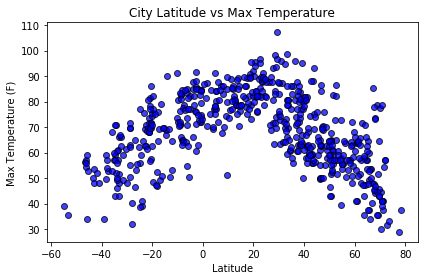

In [9]:
y_axis = clean_city_data_df['Max Temp']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Max Temperature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Temperature.png')
print('This code plots the relationship between latitude and max temp. It shows that max temp increases as latitude gets closer to 0.')
plt.show()

## Latitude vs. Humidity Plot

This code plots the relationship between latitude and humidity. It shows a weak relationship with latitude.
It also sometimes looks like a Rorschach Test. But that is probably a coincidence.


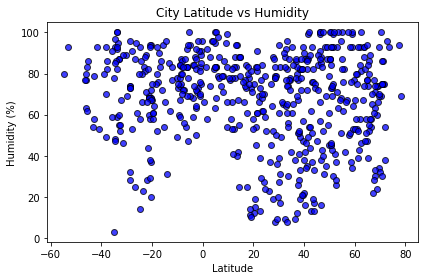

In [10]:
y_axis = clean_city_data_df['Humidity']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Humidity.png')
print('This code plots the relationship between latitude and humidity. It shows a weak relationship with latitude.')
print('It also sometimes looks like a Rorschach Test. But that is probably a coincidence.')
plt.show()

## Latitude vs. Cloudiness Plot

This code plots the relationship between latitude and cloudiness. It shows a weak relationship with latitude.


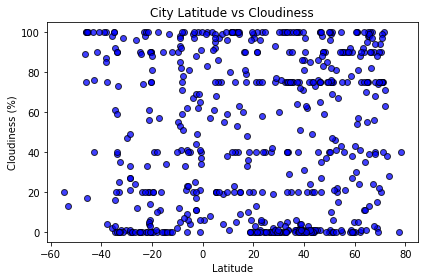

In [11]:
y_axis = clean_city_data_df['Cloudiness']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Cloudiness.png')
print('This code plots the relationship between latitude and cloudiness. It shows a weak relationship with latitude.')
plt.show()

## Latitude vs. Wind Speed Plot

This code plots the relationship between latitude and wind speed. It shows a weak relationship with latitude.


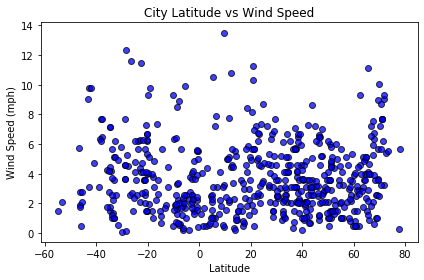

In [12]:
y_axis = clean_city_data_df['Wind Speed']
x_axis = clean_city_data_df['Lat']
plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title("City Latitude vs Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.tight_layout()
plt.savefig('../output_data/Lat_v_Wind_Speed.png')
print('This code plots the relationship between latitude and wind speed. It shows a weak relationship with latitude.')
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_regression_plot (y_axis,NS):
    if NS == "N":
        df = northern_df
    else:
        df = southern_df
    x_values = df['Lat']
    y_values = df[y_axis]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    df.plot(kind = 'scatter',x = 'Lat', y=y_axis)
    plt.plot(x_values,regress_values,"r-")
    plt.title(f"City Latitude vs {y_axis}")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_axis}')
    plt.tight_layout()
    plt.savefig(f'../output_data/Lat_v_{y_axis}_-{NS}.png')
    print(f"The r-squared is: {round(rvalue**2,3)}")
    print(f'The line equation is: {line_eq}')
    if rvalue**2 > 0.5:
        print(f'This shows an explanatory relationship between Latitude and {y_axis}. An r-squared of {round(rvalue**2,3)} is decent.')
        print('Might be worth looking into more. Correlation is not causation tho, so do not get your hopes up.')
    else:
        print(f'This shows a weak or non-existent explanatory relationship between Latitude and {y_axis}. An r-squared of {round(rvalue**2,3)} is not great.')
        print('Correlation is not causation tho. Which is good, because this is weak sauce.')
    plt.show()    

In [14]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] >0]
southern_df = clean_city_data_df.loc[clean_city_data_df['Lat'] <0]
print(f'There are {len(northern_df)} cities in the Northern Hemisphere dataframe, and {len(southern_df)} cities in the Southern Hemisphere dataframe.')
print(f'There are {len(clean_city_data_df)-len(northern_df)-len(southern_df)} cities at 0 Latitude.')

There are 393 cities in the Northern Hemisphere dataframe, and 181 cities in the Southern Hemisphere dataframe.
There are 0 cities at 0 Latitude.


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.516
The line equation is: y = -0.56x + 91.51
This shows an explanatory relationship between Latitude and Max Temp. An r-squared of 0.516 is decent.
Might be worth looking into more. Correlation is not causation tho, so do not get your hopes up.


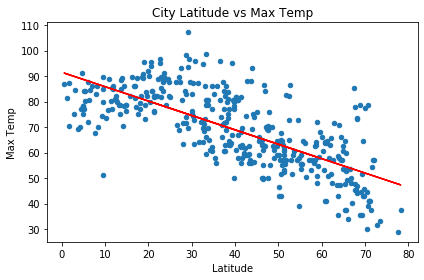

In [15]:
linear_regression_plot('Max Temp','N')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.449
The line equation is: y = 0.67x + 79.0
This shows a weak or non-existent explanatory relationship between Latitude and Max Temp. An r-squared of 0.449 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


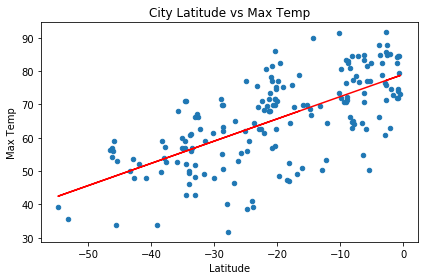

In [16]:
linear_regression_plot('Max Temp','S')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0
The line equation is: y = -0.02x + 66.4
This shows a weak or non-existent explanatory relationship between Latitude and Humidity. An r-squared of 0.0 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


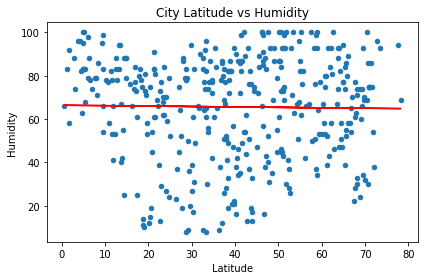

In [17]:
linear_regression_plot('Humidity','N')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.008
The line equation is: y = 0.12x + 75.08
This shows a weak or non-existent explanatory relationship between Latitude and Humidity. An r-squared of 0.008 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


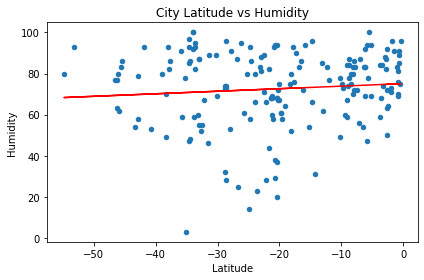

In [18]:
linear_regression_plot('Humidity','S')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.003
The line equation is: y = 0.11x + 44.49
This shows a weak or non-existent explanatory relationship between Latitude and Cloudiness. An r-squared of 0.003 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


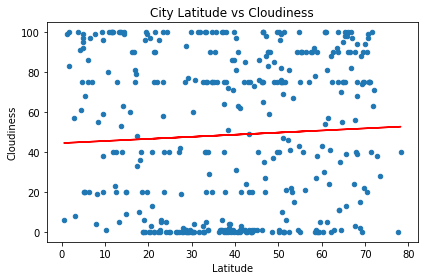

In [19]:
linear_regression_plot('Cloudiness','N')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.002
The line equation is: y = -0.13x + 42.39
This shows a weak or non-existent explanatory relationship between Latitude and Cloudiness. An r-squared of 0.002 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


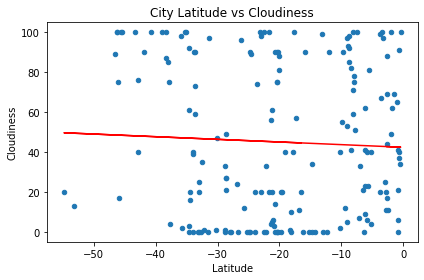

In [20]:
linear_regression_plot('Cloudiness','S')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.008
The line equation is: y = 0.01x + 3.24
This shows a weak or non-existent explanatory relationship between Latitude and Wind Speed. An r-squared of 0.008 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


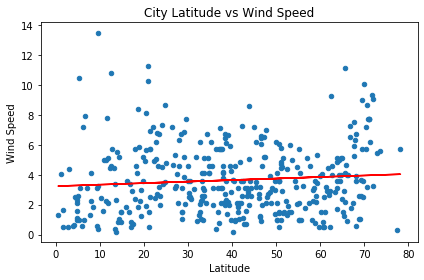

In [21]:
linear_regression_plot('Wind Speed','N')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.037
The line equation is: y = -0.04x + 3.0
This shows a weak or non-existent explanatory relationship between Latitude and Wind Speed. An r-squared of 0.037 is not great.
Correlation is not causation tho. Which is good, because this is weak sauce.


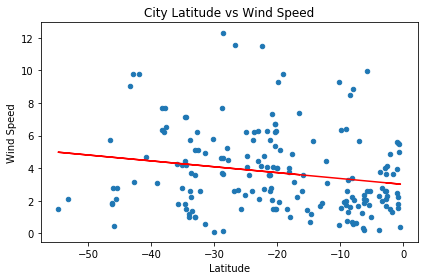

In [22]:
linear_regression_plot('Wind Speed','S')

In [23]:
#Observations or insights about the data.
print('It is possible to draw initial conclusions from this analysis. Here are three observable trends based on the data.')
print(f'1. Max temp tends to increases as latitude gets closer to 0. This makes sense, because the equator recieves more sunlight.')
print(f'2. There are more datapoints in the northern hemisphere. This is likely because there is more land and less ocean.')
print(f'3. There is no strong relationship between latitude and wind speed or humidity. This makes sense, because other factors e.g. altitude are likely to be more important drivers.')

It is possible to draw initial conclusions from this analysis. Here are three observable trends based on the data.
1. Max temp tends to increases as latitude gets closer to 0. This makes sense, because the equator recieves more sunlight.
2. There are more datapoints in the northern hemisphere. This is likely because there is more land and less ocean.
3. There is no strong relationship between latitude and wind speed or humidity. This makes sense, because other factors e.g. altitude are likely to be more important drivers.
